<img src="https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/media/logo/newebac_logo_black_half.png" alt="ebac-logo">

---

# **Módulo 16** |Method_chaining
Caderno de **exercício**<br>

# Previsão de Renda 

## Discente: Samuel Saturno

### 4 elementos importantes
- Esse notebook
- Streamlit com as análises
- Seu Github com o projeto
- Vídeo no readme do github mostrando o streamlit

## Etapa 1 CRISP - DM: Entendimento do negócio

O principal cliente da empresa, SOS Investimentos, solicitou uma análise para prospectar a aquisição de novas contas e liberar capital para clientes adimplentes. Isso sugere que a empresa está interessada em expandir sua base de clientes ao mesmo tempo em que busca otimizar seus recursos ao liberar capital para clientes confiáveis e adimplentes.

Para atender a essa solicitação, é crucial entender os seguintes pontos:

* Objetivos do Projeto:

Prospectar aquisição de novas contas: identificar potenciais clientes que possam se beneficiar dos serviços e produtos oferecidos pela SOS Investimentos.

Liberação de capital para clientes adimplentes: identificar os clientes existentes que têm um histórico sólido de adimplência e são candidatos viáveis para a liberação de mais capital.

* Indicadores-Chave de Desempenho (KPIs):
        
Para prospectar novas contas, os KPIs podem incluir taxas de conversão de leads, retorno sobre investimento (ROI) em campanhas de marketing, e número de novas contas abertas.

Para a liberação de capital, os KPIs podem incluir histórico de pagamentos, níveis de risco associados a cada cliente e oportunidades de upselling ou cross-selling.

* Recursos Disponíveis:

Avaliar os recursos disponíveis em termos de pessoal, tecnologia e dados para conduzir as análises necessárias.

Determinar se são necessários investimentos adicionais em ferramentas de análise de dados, campanhas de marketing ou estratégias de retenção de clientes.

* Contexto de Mercado e Competitivo:

Entender o cenário econômico atual, tendências de mercado e concorrência para informar as estratégias de prospecção e retenção de clientes.

Identificar oportunidades únicas ou desafios específicos que podem influenciar as decisões de investimento e liberação de capital.

* Estratégias e Planos de Ação:

Desenvolver estratégias claras para alcançar os objetivos do projeto, incluindo campanhas de marketing direcionadas, análise de segmentação de clientes e abordagens personalizadas para clientes adimplentes.

Estabelecer planos de ação detalhados, incluindo cronogramas, responsabilidades da equipe e métricas de acompanhamento para avaliar o progresso ao longo do tempo.

Ao compreender esses aspectos do negócio, a equipe poderá direcionar efetivamente suas análises e esforços para atender às necessidades e expectativas do cliente SOS Investimentos, maximizando assim o valor entregue através da prospecção de novas contas e da liberação estratégica de capital para clientes adimplentes.


## Etapa 2 Crisp-DM: Entendimento dos dados

* Data de Referência (data_ref):

Verifique se todas as datas estão formatadas de maneira consistente para garantir que possam ser usadas em análises de séries temporais ou para entender a dinâmica dos dados ao longo do tempo.

* Código de Identificação do Cliente (id_cliente):

Certifique-se de que não há duplicatas ou erros nos códigos de identificação dos clientes, pois isso pode afetar análises que dependem de identificação única de clientes.

* Variáveis Categóricas (sexo, tipo_renda, educacao, estado_civil, tipo_residencia):

Para variáveis categóricas, é importante verificar se todas as categorias estão corretamente codificadas e se não há valores faltantes ou desconhecidos que possam impactar análises posteriores.

* Variáveis Booleanas (posse_de_veiculo, posse_de_imovel):

Certifique-se de que essas variáveis estão corretamente codificadas como booleanas (True/False) para facilitar análises que dependem de condições específicas, como posse de veículo ou imóvel.

* Variáveis Numéricas (qtd_filhos, idade, tempo_emprego, qt_pessoas_residencia, renda):

Verifique se não há valores extremos ou inconsistentes nessas variáveis numéricas, como idades negativas, valores de renda irreais ou tempos de emprego fora do esperado para a realidade do negócio.


* Tratamento de Dados Faltantes:

Analise se há valores faltantes em alguma das variáveis e decida sobre a melhor abordagem para lidar com esses dados ausentes, seja por imputação de valores, exclusão de registros ou outras técnicas de tratamento de dados faltantes.

* Análise Exploratória de Dados (EDA):

Realize uma análise exploratória dos dados para entender melhor a distribuição de cada variável, identificar correlações entre variáveis e explorar padrões que possam ser relevantes para os objetivos do projeto.

* Preparação de Dados:

Prepare os dados de acordo com as necessidades específicas das análises ou modelagens que serão realizadas nas etapas seguintes do projeto, como codificação de variáveis categóricas, normalização de dados numéricos, etc.


### Dicionário de dados



| Variável                | Descrição                                           | Tipo         |
| ----------------------- |:---------------------------------------------------:| ------------:|
| data_ref                | Data de referência de coleta das variáveis          |    object    |
| id_cliente              | Código de identificação do cliente                  |    int64     |
| sexo                    | Sexo do cliente                                     |    object    |
| posse_de_veiculo        | Indica se o cliente possui veículo                  |     bool     |
| posse_de_imovel         | Indica se o cliente possui imóvel                   |     bool     |
| qtd_filhos              | Quantidade de filhos do cliente                     |    int64     |
| tipo_renda              | Tipo de renda do cliente                            |    object    |
| educacao                | Grau de instrução do cliente                        |    object    |
| estado_civil            | Estado civil do cliente                             |    object    |
| tipo_residencia         | Tipo de residência do cliente (própria, alugada etc)|    object    |
| idade                   | Idade do cliente                                    |    int64     |
| tempo_emprego           | Tempo no emprego atual                              |   float64    |
| qt_pessoas_residencia   | Quantidade de pessoas que moram na residência       |   float64    |
| renda                   | Renda em reais                                      |   float64    |





### Carregando pacote "ydata_profiling" para análise avançadas dos dados. 


In [1]:
!pip install ydata_profiling

### Importando as Bibliotecas 

In [34]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stats
from pathlib import Path
import pandas_profiling
import os
import sys 
import matplotlib.pyplot as plt
from ydata_profiling import ProfileReport

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler

%matplotlib inline


### Carregando o Dataframe "previsao_de_renda.csv"

In [4]:
renda = pd.read_csv('previsao_de_renda.csv')
profile = ProfileReport(renda, title="Profiling Report")

#renda = pd.DataFrame(renda)
# Exibir a primeira linha do Dataframe 
renda.head(1)

,Unnamed: 0,data_ref,id_cliente,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda
0,0,2015-01-01,15056,F,False,True,0,Empresário,Secundário,Solteiro,Casa,26,6.60274,1.0,8060.34


In [5]:
# Drop da coluna 'Unnamed: 0'
renda.drop('Unnamed: 0', axis=1, inplace=True)

In [6]:
#renda = pd.DataFrame(renda) após drop de coluna 
renda.head(1)

,data_ref,id_cliente,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda
0,2015-01-01,15056,F,False,True,0,Empresário,Secundário,Solteiro,Casa,26,6.60274,1.0,8060.34


#### Entendimento dos dados - Univariada
Nesta etapa tipicamente avaliamos a distribuição de todas as variáveis.

In [7]:
# Aplicando pandas profiling 
# Gerar relatório 
prof = ProfileReport(renda, explorative=True, minimal=True)

# Criar diretório de saída 
output_dir = Path('./output')
output_dir.mkdir(parents=True, exist_ok=True)

# Salve o relatório em arquivo 
prof.to_file(output_dir / 'renda_analisys.html')


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

### Entendimento dos dados - Bivariadas




In [8]:
# Selecionar apenas as variáveis quantitativas do DataFrame
renda_quantitativa = renda.select_dtypes(include=['int64', 'float64'])

In [9]:
# Exibir a correlação entre as variáveis 
renda_quantitativa.corr()

,id_cliente,qtd_filhos,idade,tempo_emprego,qt_pessoas_residencia,renda
id_cliente,1.000000,0.030296,-0.057812,-0.036373,0.037951,-0.009129
qtd_filhos,0.030296,1.000000,-0.360426,-0.063220,0.889777,0.029346
idade,-0.057812,-0.360426,1.000000,0.321573,-0.339320,0.022435
tempo_emprego,-0.036373,-0.063220,0.321573,1.000000,-0.065670,0.385013
qt_pessoas_residencia,0.037951,0.889777,-0.339320,-0.065670,1.000000,0.047842
renda,-0.009129,0.029346,0.022435,0.385013,0.047842,1.000000


In [10]:
# Dividir o DataFrame em grupos com base na posse de imóvel
grupo_posse_imovel = renda.groupby('posse_de_imovel')['renda'].apply(list)

# Visualizando os dados
grupo_posse_imovel


posse_de_imovel
False    [6475.97, 6402.41, 581.18, 3675.33, 856.31, 10...
True     [8060.34, 1852.15, 2253.89, 6600.77, 1445.87, ...
Name: renda, dtype: object

In [11]:
# Teste t para comparar as médias de renda entre os grupos
t_stat_imovel, p_valor_imovel = stats.ttest_ind(grupo_posse_imovel[0], grupo_posse_imovel[1])


In [12]:
# Visualizando os dados de teste
print("Posse de imóvel:")
print("   Teste t-valor:", t_stat_imovel)
print("   Valor p:", p_valor_imovel)

Posse de imóvel:
   Teste t-valor: -0.47512780825537565
   Valor p: 0.6347027976671364


In [13]:
# Dividir o DataFrame em grupos com base na posse de veículo
grupo_posse_veiculo = renda.groupby('posse_de_veiculo')['renda'].apply(list)

# visualizando os grupo
grupo_posse_veiculo

posse_de_veiculo
False    [8060.34, 6600.77, 1445.87, 1726.03, 2515.98, ...
True     [1852.15, 2253.89, 6475.97, 12939.14, 581.18, ...
Name: renda, dtype: object

In [14]:
# Teste t para comparar as médias de renda entre os grupos
t_stat_veiculo, p_valor_veiculo = stats.ttest_ind(grupo_posse_veiculo[0], grupo_posse_veiculo[1])

# Visualizando o valores de teste
print("Posse de veículo:")
print("   Teste t-valor:", t_stat_veiculo)
print("   Valor p:", p_valor_veiculo)

Posse de veículo:
   Teste t-valor: -12.369567394143342
   Valor p: 5.655201142039675e-35


## Etapa 3 Crisp-DM: Preparação dos dados

* **Seleção**:
        Nesta etapa, devemos avaliar se os dados que temos selecionados são adequados para os objetivos do projeto. Isso envolve verificar se todas as variáveis necessárias estão presentes e se não há excesso de variáveis irrelevantes que possam prejudicar a análise.

* **Limpeza**:
        A limpeza de dados é uma parte crucial da preparação dos dados. Devemos identificar e tratar dados faltantes (valores ausentes), outliers (valores extremos que podem distorcer análises), erros de digitação e inconsistências nos dados. Métodos como imputação de valores faltantes, remoção de outliers e correção de erros podem ser aplicados nesta etapa.

* **Construção**:
        A construção de novas variáveis envolve a criação de características adicionais que podem ser úteis para a análise e modelagem. Isso pode incluir a transformação de variáveis existentes, criação de variáveis derivadas (como proporções, índices, variáveis categóricas a partir de variáveis numéricas) e criação de variáveis dummy para representar variáveis categóricas em modelos.

* **Integração**:
        Se houver múltiplas fontes de dados relevantes para o projeto, a etapa de integração seria necessária para combinar esses dados de forma coesa. No seu caso, se você possui apenas uma fonte de dados, essa etapa não seria necessária.

* **Formatação**:
        A formatação dos dados envolve garantir que os dados estejam em formatos úteis para análise. Isso inclui garantir que as variáveis estejam no tipo de dados correto (por exemplo, variáveis numéricas como float64 ou int64, variáveis categóricas como object ou category), que as datas estejam no formato correto, e que não haja problemas de codificação nos dados.



In [36]:

# Verificar as primeiras linhas do DataFrame para entender a estrutura dos dados
print(renda.head())

# Verificar se as colunas necessárias estão presentes e se há excesso de variáveis irrelevantes
print(renda.columns)

# Verificar se há dados faltantes (valores ausentes) no DataFrame
print(renda.isnull().sum())

# Identificar e tratar dados faltantes, outliers e inconsistências nos dados
renda['tempo_emprego'].fillna(renda['tempo_emprego'].median(), inplace=True)


# Exemplo de remoção de outliers: remover valores acima de um limite específico
limite_superior = renda['renda'].quantile(0.95)  # Definindo o limite superior como o quantil de 95%
renda = renda[renda['renda'] <= limite_superior]

# Verificar novamente se há dados faltantes após o tratamento
print(renda.isnull().sum())

# Criar novas variáveis, se necessário
# Exemplo: criar uma variável 'renda_maior_media' indicando se a renda é maior que a média
media_renda = renda['renda'].mean()
renda['renda_maior_media'] = renda['renda'] > media_renda

# Verificar a estrutura do DataFrame após as operações de limpeza e construção
print(renda.info())

# Salvar o DataFrame modificado se desejar
# renda.to_csv('novo_arquivo.csv', index=False)



     data_ref  id_cliente sexo  posse_de_veiculo  posse_de_imovel  qtd_filhos  \
0  2015-01-01       15056    F             False             True           0   
1  2015-01-01        9968    M              True             True           0   
2  2015-01-01        4312    F              True             True           0   
3  2015-01-01       10639    F             False             True           1   
4  2015-01-01        7064    M              True            False           0   

         tipo_renda           educacao estado_civil tipo_residencia  idade  \
0        Empresário         Secundário     Solteiro            Casa     26   
1       Assalariado  Superior completo       Casado            Casa     28   
2        Empresário  Superior completo       Casado            Casa     35   
3  Servidor público  Superior completo       Casado            Casa     30   
4       Assalariado         Secundário     Solteiro   Governamental     33   

   tempo_emprego  qt_pessoas_residencia    r

## Etapa 4 Crisp-DM: Modelagem
Nessa etapa que realizaremos a construção do modelo. Os passos típicos são:
- Selecionar a técnica de modelagem
- Desenho do teste
- Avaliação do modelo


### Selecionar a Técnica de Modelagem:
        
Com base nas variáveis fornecidas, temos uma combinação de variáveis numéricas (int64, float64) e categóricas (object, bool). A escolha da técnica de modelagem dependerá do tipo de problema que você deseja resolver. Alguns exemplos de técnicas de modelagem incluem regressão linear para prever uma variável contínua como renda, regressão logística para problemas de classificação binária, ou até mesmo modelos de árvore de decisão para lidar com variáveis categóricas.
        Se você puder fornecer mais detalhes sobre o objetivo específico do modelo (por exemplo, prever a renda, determinar a posse de imóvel com base em outras variáveis, etc.), será possível sugerir uma técnica de modelagem mais adequada.

### Desenho do Teste:

O desenho do teste envolve dividir o conjunto de dados em conjuntos de treinamento e teste para avaliar o desempenho do modelo. Como parte do desenho do teste, também é importante considerar técnicas como validação cruzada para garantir que o modelo seja robusto e generalize bem para dados não vistos.
        Você pode usar a função train_test_split da biblioteca scikit-learn para dividir os dados em conjunto de treinamento e teste.

### Avaliação do Modelo:

Após treinar o modelo e fazer previsões nos dados de teste, é crucial avaliar o desempenho do modelo. Para problemas de regressão, métricas como o coeficiente de determinação (R²), erro médio absoluto (MAE) e erro quadrático médio (MSE) são comuns. Para problemas de classificação, métricas como acurácia, precisão, recall, F1-score e AUC-ROC são importantes para avaliar o desempenho do modelo.



### Rodando o modelo


In [23]:
renda.columns

Index(['data_ref', 'id_cliente', 'sexo', 'posse_de_veiculo', 'posse_de_imovel',
       'qtd_filhos', 'tipo_renda', 'educacao', 'estado_civil',
       'tipo_residencia', 'idade', 'tempo_emprego', 'qt_pessoas_residencia',
       'renda', 'renda_maior_media'],
      dtype='object')

In [26]:
# Selecionar as features e a variável alvo
X = renda[['qtd_filhos', 'idade','tempo_emprego' , 'qt_pessoas_residencia']]
y = renda['renda']

# Dividir os dados em conjunto de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inicializar e treinar o modelo de regressão linear
model = LinearRegression()
model.fit(X_train, y_train)

# Fazer previsões com o conjunto de teste
y_pred = model.predict(X_test)

# Avaliar o desempenho do modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Erro quadrático médio (MSE): {mse:.2f}')
print(f'Coeficiente de determinação (R²): {r2:.2f}')


Erro quadrático médio (MSE): 6145838.34
Coeficiente de determinação (R²): 0.07


In [27]:
# Padronização
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)


In [29]:
# Selecionar as features e a variável alvo
X = renda[['qtd_filhos', 'idade', 'tempo_emprego', 'qt_pessoas_residencia']]
y = renda['renda']

# Dividir os dados em conjunto de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalização das variáveis
scaler_norm = MinMaxScaler()
X_train_normalized = scaler_norm.fit_transform(X_train)
X_test_normalized = scaler_norm.transform(X_test)

# Padronização das variáveis
scaler_std = StandardScaler()
X_train_standardized = scaler_std.fit_transform(X_train)
X_test_standardized = scaler_std.transform(X_test)

# Inicializar e treinar o modelo de regressão linear com variáveis normalizadas
model_norm = LinearRegression()
model_norm.fit(X_train_normalized, y_train)

# Fazer previsões com o conjunto de teste normalizado
y_pred_norm = model_norm.predict(X_test_normalized)

# Avaliar o desempenho do modelo normalizado
mse_norm = mean_squared_error(y_test, y_pred_norm)
r2_norm = r2_score(y_test, y_pred_norm)

print(f'Erro quadrático médio (MSE) com normalização: {mse_norm:.2f}')
print(f'Coeficiente de determinação (R²) com normalização: {r2_norm:.2f}')

# Inicializar e treinar o modelo de regressão linear com variáveis padronizadas
model_std = LinearRegression()
model_std.fit(X_train_standardized, y_train)

# Fazer previsões com o conjunto de teste padronizado
y_pred_std = model_std.predict(X_test_standardized)

# Avaliar o desempenho do modelo padronizado
mse_std = mean_squared_error(y_test, y_pred_std)
r2_std = r2_score(y_test, y_pred_std)

print(f'Erro quadrático médio (MSE) com padronização: {mse_std:.2f}')
print(f'Coeficiente de determinação (R²) com padronização: {r2_std:.2f}')


Erro quadrático médio (MSE) com normalização: 6145838.34
Coeficiente de determinação (R²) com normalização: 0.07
Erro quadrático médio (MSE) com padronização: 6145838.34
Coeficiente de determinação (R²) com padronização: 0.07


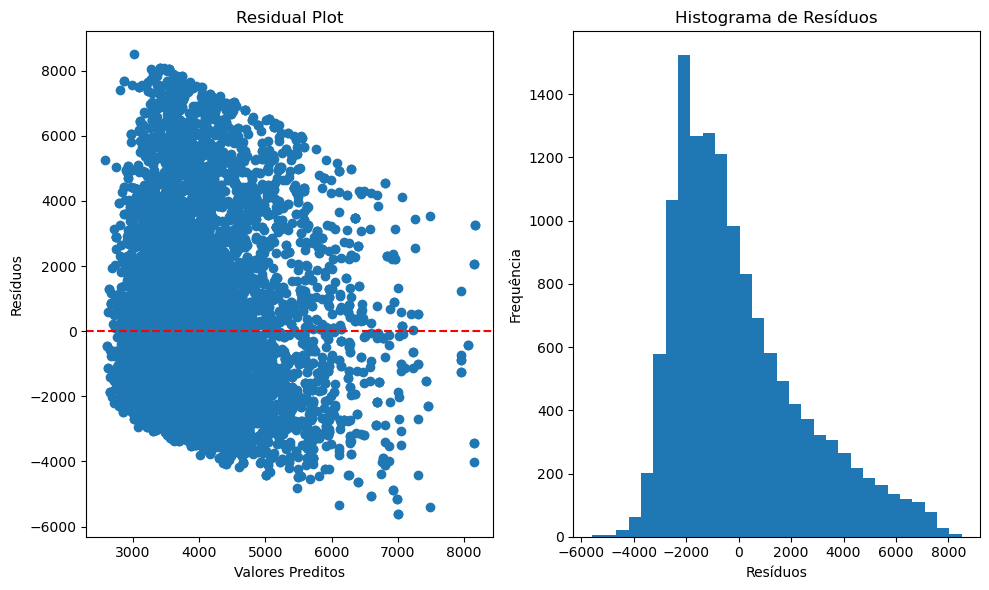

Erro quadrático médio (MSE) dos resíduos: 6042749.24
Coeficiente de determinação (R²) dos resíduos: 0.08


In [33]:
# Selecionar as features e a variável alvo
X = renda[['qtd_filhos', 'idade', 'tempo_emprego', 'qt_pessoas_residencia']]
y = renda['renda']

# Inicializar e treinar o modelo de regressão linear
model = LinearRegression()
model.fit(X, y)

# Fazer previsões
y_pred = model.predict(X)

# Calcular os resíduos
residuals = y - y_pred

# Plotar gráficos de análise de resíduos
plt.figure(figsize=(10, 6))

# Gráfico de dispersão entre os valores preditos e os resíduos
plt.subplot(1, 2, 1)
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residual Plot')
plt.xlabel('Valores Preditos')
plt.ylabel('Resíduos')

# Histograma dos resíduos
plt.subplot(1, 2, 2)
plt.hist(residuals, bins=30)
plt.title('Histograma de Resíduos')
plt.xlabel('Resíduos')
plt.ylabel('Frequência')

plt.tight_layout()
plt.show()

# Calcular métricas de avaliação dos resíduos
mse_residuos = mean_squared_error(y, y_pred)
r2_residuos = r2_score(y, y_pred)

print(f'Erro quadrático médio (MSE) dos resíduos: {mse_residuos:.2f}')
print(f'Coeficiente de determinação (R²) dos resíduos: {r2_residuos:.2f}')


## Etapa 5 Crisp-DM: Avaliação dos resultados


### Insight 01:

Uma análise bivariada entre a variável "Posse de imóvel" e a "Renda". Os resultados do teste t-valor e valor p são indicativos da relação entre essas variáveis:

* Teste t-valor:

O teste t-valor é uma medida estatística que indica a diferença entre as médias de duas amostras. No contexto da posse de imóvel, um teste t-valor negativo (-0.475) indica que há uma tendência de que as médias das duas amostras (possuidores de imóvel e não possuidores) sejam diferentes, mas essa diferença não é muito grande em termos absolutos.


* Valor p:

O valor p é uma medida estatística que indica a significância estatística da diferença observada entre as amostras. No seu caso, o valor p é 0.6347. Um valor p alto (próximo de 1) sugere que não há evidências suficientes para rejeitar a hipótese nula de que não existe diferença significativa entre as médias das duas amostras.

* Interpretando o insight:

Com base nos resultados do teste t-valor e do valor p, não encontramos evidências estatisticamente significativas para afirmar que a posse de imóvel está significativamente relacionada com a variável analisada. Em outras palavras, não parece haver uma diferença significativa nos valores médios da variável analisada entre os grupos de pessoas que possuem e não possuem imóveis.

É importante considerar o contexto específico da análise e os objetivos do projeto ao interpretar esses resultados. Mesmo que não haja uma relação significativa identificada neste momento, outros insights e análises podem ser realizados para entender melhor o impacto da posse de imóvel ou explorar outras variáveis que possam estar mais diretamente relacionadas à variável de interesse.


### Insight 02 :

O teste t com valor de -12.369567394143342 e um valor p extremamente baixo (5.655201142039675e-35) indicam uma forte associação estatística entre a renda das pessoas e sua posse de veículo. Isso sugere que, em geral, quanto maior a renda de uma pessoa, maior a probabilidade de ela possuir um veículo. Esse insight é consistente com a intuição de que a posse de veículo está diretamente relacionada à capacidade financeira das pessoas.

### Insight 03: 

### Erro Quadrático Médio (MSE):

O erro quadrático médio (MSE) é uma medida que quantifica a média dos quadrados dos erros entre os valores reais e as previsões do modelo. O MSE foi calculado como 6145838.34. Isso significa que, em média, os erros quadráticos das previsões em relação aos valores reais são bastante elevados. Um MSE alto indica que o modelo não está conseguindo prever com precisão a renda com base nas variáveis selecionadas.

### Coeficiente de Determinação (R²):

O coeficiente de determinação (R²) é uma medida que indica a proporção da variância na variável dependente (no seu caso, a renda) que é explicada pelas variáveis independentes do modelo. Um R² de 0.07 indica que apenas cerca de 7% da variabilidade na renda é explicada pelas variáveis utilizadas no modelo. Isso sugere que o modelo tem um poder explicativo muito baixo e não está capturando adequadamente a relação entre as variáveis e a renda.

### Conclusão:

Com base nos resultados do MSE e do R², podemos concluir que o modelo de regressão linear construído para prever a renda não está tendo um desempenho satisfatório. O alto MSE indica que as previsões estão distantes dos valores reais da renda, enquanto o baixo R² sugere que o modelo não está capturando a variabilidade da renda com base nas variáveis fornecidas.
    Isso pode ser devido a diversos fatores, como a escolha inadequada de variáveis, falta de correlação linear forte entre as variáveis e a renda, presença de outliers ou não linearidades que o modelo linear não consegue capturar.

## Etapa 6 Crisp-DM: Implantação
Nessa etapa colocamos em uso o modelo desenvolvido, normalmente implementando o modelo desenvolvido em um motor que toma as decisões com algum nível de automação.

Após a análise dos insights, identificamos que o modelo de regressão linear não está proporcionando resultados satisfatórios para a predição. Diante disso, é fundamental explorar abordagens alternativas e técnicas de modelagem mais adequadas para melhorar a performance da predição. Abaixo estão algumas sugestões de próximos passos que podem ser adotados:

* Explorar Outros Algoritmos:

Uma primeira estratégia é explorar outros algoritmos de machine learning que sejam mais robustos para o problema em questão. Algoritmos como árvores de decisão, random forests, gradient boosting e redes neurais podem capturar relações mais complexas nos dados, proporcionando resultados mais precisos.

* Feature Engineering:

Refinar ou criar novas features pode ser crucial para capturar melhor a relação entre as variáveis independentes e a variável alvo. A engenharia de features envolve técnicas como transformações, criação de variáveis derivadas e seleção de features mais relevantes, o que pode melhorar significativamente a capacidade do modelo de fazer boas previsões.

* Tratamento de Outliers e Anomalias:

É importante identificar e tratar outliers ou dados anômalos que possam estar impactando negativamente o desempenho do modelo. Essas observações atípicas podem distorcer as relações entre as variáveis e a variável alvo, sendo necessário removê-las ou aplicar técnicas de transformação adequadas.

* Validação Cruzada e Ajuste de Hiperparâmetros:

Utilizar técnicas de validação cruzada e ajuste de hiperparâmetros é fundamental para otimizar o desempenho do modelo. Isso envolve testar diferentes combinações de parâmetros do modelo para encontrar a configuração que resulta em melhores métricas de avaliação, garantindo a generalização do modelo para novos dados.
